# Project 1

In this first project you will create a framework to scope out data science projects. This framework will provide you with a guide to develop a well-articulated problem statement and analysis plan that will be robust and reproducible.

### Read and evaluate the following problem statement: 
Determine which free-tier customers will covert to paying customers, using demographic data collected at signup (age, gender, location, and profession) and customer useage data (days since last log in, and activity score 1 = active user, 0= inactive user) based on Hooli data from Jan-Apr 2015. 


#### 1. What is the outcome?

#### 2. What are the predictors/covariates? 

#### 3. What timeframe is this data relevent for?

#### 4. What is the hypothesis?

## Let's get started with our dataset

#### 1. Create a data dictionary 

Answer: 

Variable | Description | Type of Variable
---| ---| ---
admit | 0 = not admitted 1 = admitted | categorical
gre | numerical GRE score (min 200, max 800) | continuous 
gpa | college grade point average (min 0.00, max 4.00) | continuous
prestige | college prestige of applicant (1 = highest, 4 = lowest) | categorical


We would like to explore the association between gre, gpa, prestige (predictors); and admission.

#### 2. What is the outcome?

#### 3. What are the predictors/covariates? 

#### 4. What timeframe is this data relevent for?

#### 4. What is the hypothesis?

    Using the above information, write a well-formed problem statement. 


## Problem Statement

### Exploratory Analysis Plan

Using the lab from a class as a guide, create an exploratory analysis plan. 

#### 1. What are the goals of the exploratory analysis? 

#### 2a. What are the assumptions of the distribution of data? 

#### 2b. How will determine the distribution of your data? 

In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
df = pd.read_csv('../assets/admissions.csv')

In [6]:
df.describe()

,admit,gre,gpa,prestige
count,400.000000,398.000000,398.00000,399.000000
mean,0.317500,588.040201,3.39093,2.486216
std,0.466087,115.628513,0.38063,0.945333
min,0.000000,220.000000,2.26000,1.000000
25%,0.000000,520.000000,3.13000,2.000000
50%,0.000000,580.000000,3.39500,2.000000
75%,1.000000,660.000000,3.67000,3.000000
max,1.000000,800.000000,4.00000,4.000000


In [7]:
df[df['gre'].isnull()]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
212,0,NaN,2.87,2.0


In [8]:
df[df['gpa'].isnull()]

,admit,gre,gpa,prestige
187,0,NaN,NaN,2.0
236,1,660.0,NaN,NaN


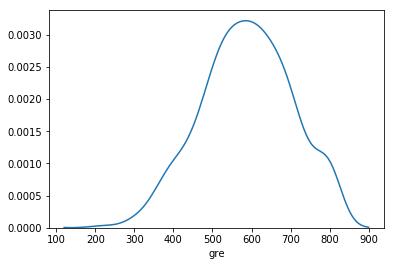

In [19]:
sns.distplot(df['gre'].dropna(),hist=False)

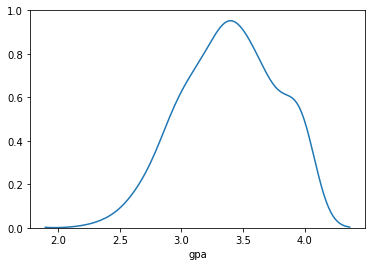

In [18]:
sns.distplot(df['gpa'].dropna(),hist=False)

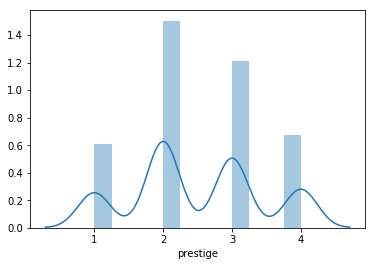

In [17]:
sns.distplot(df['prestige'].dropna())

#### 3a. How might outliers impact your analysis? 

#### 3b. How will you test for outliers? 

In [21]:
df2 = df.dropna()

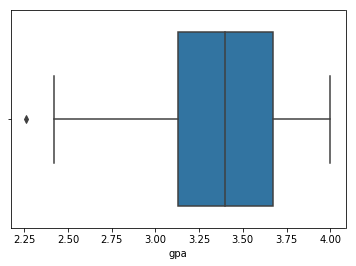

In [23]:
sns.boxplot(df2['gpa'])

In [32]:
df2.sort_values(by='gpa').head()

,admit,gre,gpa,prestige
289,0,420.0,2.26,4.0
372,1,680.0,2.42,1.0
40,0,560.0,2.42,2.0
48,0,440.0,2.48,4.0
156,0,560.0,2.52,2.0


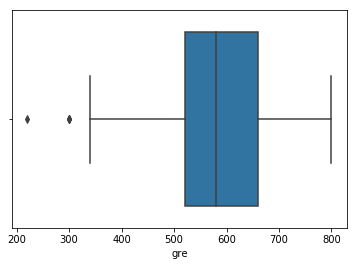

In [25]:
sns.boxplot(df2['gre'])

In [33]:
df2.sort_values(by='gre').head()

,admit,gre,gpa,prestige
304,0,220.0,2.83,3.0
179,0,300.0,3.01,3.0
71,0,300.0,2.92,4.0
315,1,300.0,2.84,2.0
216,0,340.0,2.90,1.0


#### 4a. What is colinearity? 

#### 4b. How will you test for colinearity? 

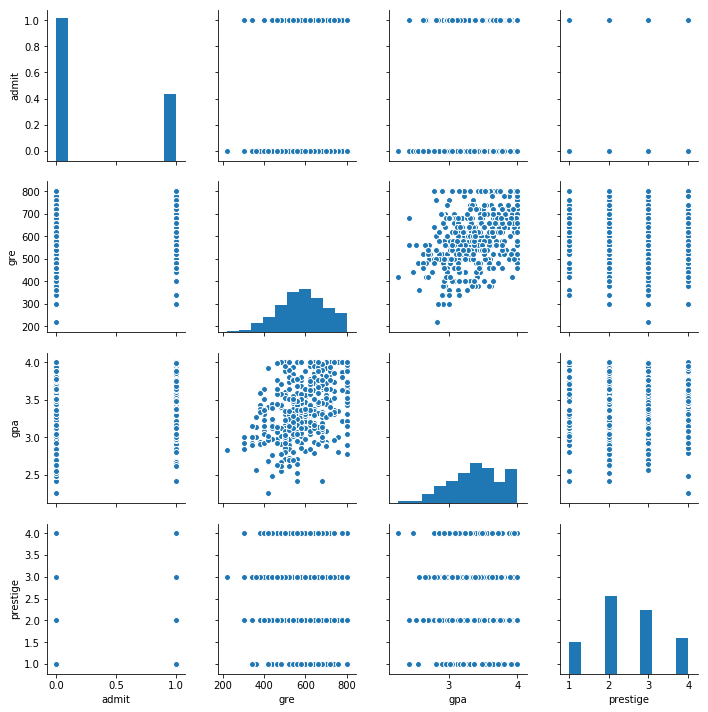

In [34]:
sns.pairplot(df2)

In [72]:
df2.corr()

,admit,gre,gpa,prestige
admit,1.000000,0.181202,0.174116,-0.243563
gre,0.181202,1.000000,0.382408,-0.124533
gpa,0.174116,0.382408,1.000000,-0.060976
prestige,-0.243563,-0.124533,-0.060976,1.000000


#### 5. What is your exploratory analysis plan?
Using the above information, write an exploratory analysis plan that would allow you or a colleague to reproduce your analysis 1 year from now. 

In [ ]:
Answer: 

#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#import data set
df = pd.read_csv('../assets/admissions.csv')

#examine descriptive statistics
df.describe()
df.mode()

#identify missing values (2 gre, 2 gpa, 1 prestige) and drop
df[df['gre'].isnull()]
df[df['gpa'].isnull()]
df2 = df.dropna()

#view distributions
sns.distplot(df2['gre'], hist=False);
sns.distplot(df2['gpa'], hist=False);
sns.distplot(df2['prestige'], kde=False);

#check for and examine outliers
sns.boxplot(df2['gpa']);
df2.sort_values(by='gpa').head()
sns.boxplot(df2['gre']);
df2.sort_values(by='gre').head()

#check for colinearity
sns.pairplot(df2);
df2.corr()
sns.swarmplot(x='prestige',y='gre',data=df2);
sns.swarmplot(x='prestige',y='gpa',data=df2);

## Bonus Questions:
1. Outline your analysis method for predicting your outcome
2. Write an alternative problem statement for your dataset
3. Articulate the assumptions and risks of the alternative model

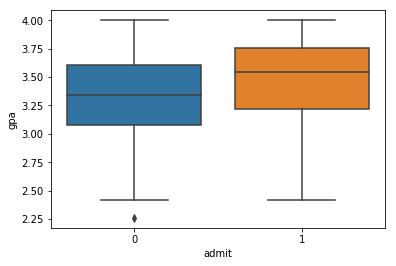

In [57]:
sns.boxplot(x='admit',y='gpa',data=df2);

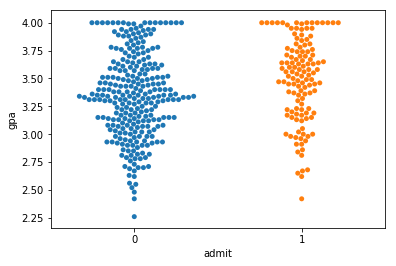

In [61]:
sns.swarmplot(x='admit',y='gpa',data=df2);

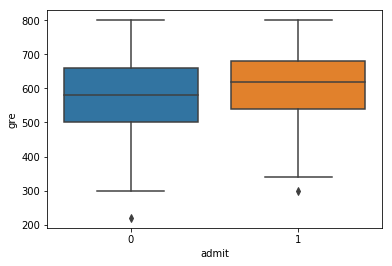

In [58]:
sns.boxplot(x='admit',y='gre',data=df2);

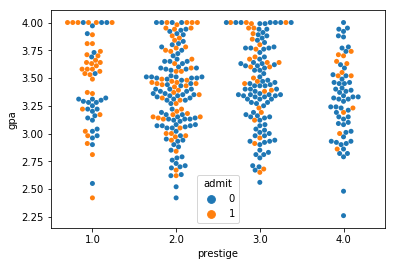

In [56]:
sns.swarmplot(x='prestige',y='gpa',data=df2, hue='admit');

In [66]:
df2.groupby(['prestige'])['admit'].mean()

prestige
1.0    0.540984
2.0    0.358108
3.0    0.231405
4.0    0.179104
Name: admit, dtype: float64

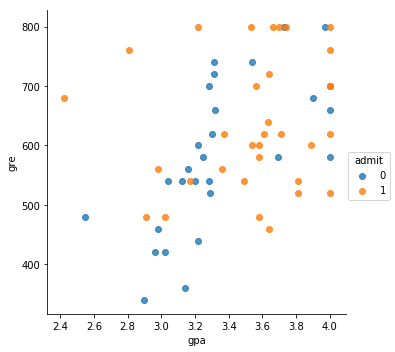

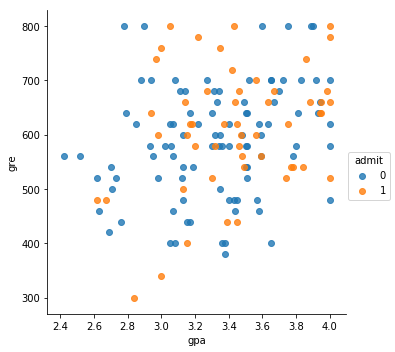

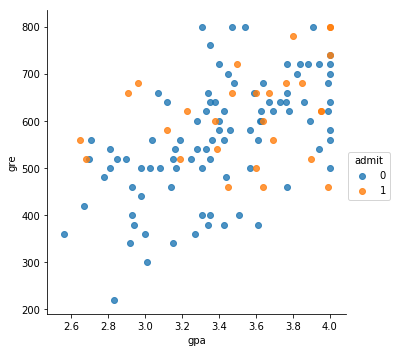

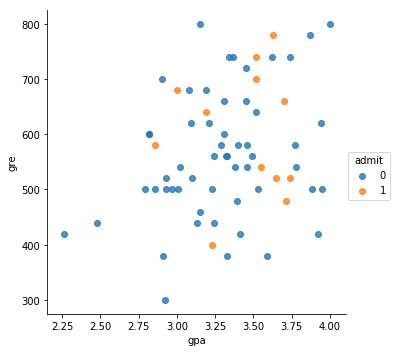

In [92]:
sns.lmplot('gpa','gre',data=df2[df2['prestige'] == 1], hue='admit', fit_reg=False);
sns.lmplot('gpa','gre',data=df2[df2['prestige'] == 2], hue='admit', fit_reg=False);
sns.lmplot('gpa','gre',data=df2[df2['prestige'] == 3], hue='admit', fit_reg=False);
sns.lmplot('gpa','gre',data=df2[df2['prestige'] == 4], hue='admit', fit_reg=False);

In [93]:
df2[df2['admit'] == 1].groupby('prestige').size()

prestige
1.0    33
2.0    53
3.0    28
4.0    12
dtype: int64

In [94]:
df2[(df2['prestige'] == 1) & (df2['gpa'] > 3.4)].admit.mean()

0.75

In [100]:
df2[(df2['prestige'] == 2) & (df2['gre'] > 700)].admit.sum()

10

In [96]:
df2[(df2['prestige'] == 1) & (df2['gpa'] <= 3.4)].admit.mean()

0.3103448275862069

In [95]:
df2[(df2['prestige'] != 1) | (df2['gpa'] <= 3.4)].admit.mean()

0.27945205479452057

In [98]:
df2[(df2['prestige'] == 2) & (df2['gre'] > 700)].admit.mean()

0.4142857142857143

In [ ]:
3. This hypothesis assumes that the data presented are representative and that future results will be similar. 